In [1]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation, PCA
from sklearn.cluster import KMeans

import pandas as pd
import nltk
import nltk.data


In [2]:
df = 'townhall.txt'


tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
fp = open("townhall.txt")
data = fp.read()

df ='\n\n'.join(tokenizer.tokenize(data))

df = df.split("\n\n")   


topics_no = 4
range_t = topics_no + 1

vectorizer = CountVectorizer(stop_words="english", ngram_range=(2,2))
vectorized = vectorizer.fit_transform(df)


lda = LatentDirichletAllocation(n_topics=topics_no, learning_method='batch')
lda.fit(vectorized)

def print_top_words(model, feature_names, n_top_words):
    print('\n--------------------------------\n')
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % (topic_idx+1))
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
print_top_words(lda, vectorizer.get_feature_names(),n_top_words = 10)


/Users/gauravsingh/anaconda2/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)



--------------------------------

Topic #1:
applause tapper, stoneman douglas, tapper thank, high school, law enforcement, douglas high, thank senator, senator nelson, want bring, town hall
Topic #2:
make sure, just want, year old, second amendment, 18 year, want bring, senator nelson, ve got, weapons war, want talk
Topic #3:
answer question, senator rubio, applause rubio, senator nelson, don want, tapper thank, believe saying, make sure, don know, dana loesch
Topic #4:
senator rubio, background check, question senator, applause rubio, unidentified female, senator nelson, assault weapons, weapons ban, don think, background checks


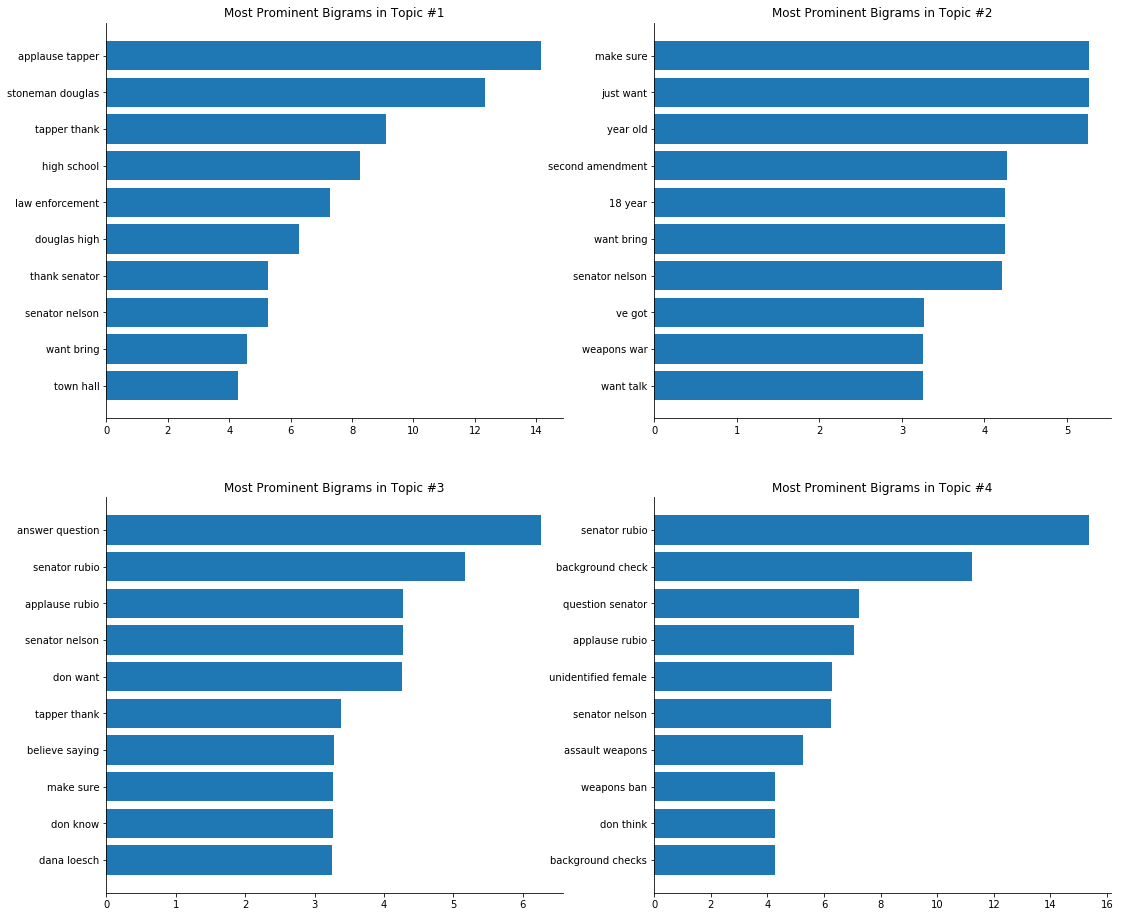

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

topics_no = 4
range_t = topics_no + 1

def plot_lda(coef, feature_names, top_n=10, ax=None, title=None):
    
    #Initialize an axis if None is given
    if ax is None:
        return None
        ax = plt.gca()
    
    #Sort coefficients and take the top_n
    inds = np.argsort(coef)
    high = inds[-top_n:]
    
    #Set a range for the plot
    myrange = range(len(high))
    
    #Plot the bar chart 
    ax.barh(myrange, coef[high])
    ax.set_yticks(myrange)
    
    ax.set_yticklabels([feature_names[h] for h in high])
    ax.yaxis.labelpad=10
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    #If a title is given, give the plot a title
    if title:
        ax.set_title(title)

components = lda.components_
feature_names = vectorizer.get_feature_names()

fig, axes = plt.subplots(2,2, figsize=(18, 16))
for component,ax,i in zip(components, axes.flatten(), range(1,range_t)):
    plot_lda(component, feature_names, ax=ax, title = 'Most Prominent Bigrams in Topic #%d' %i)

/Users/gauravsingh/anaconda2/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


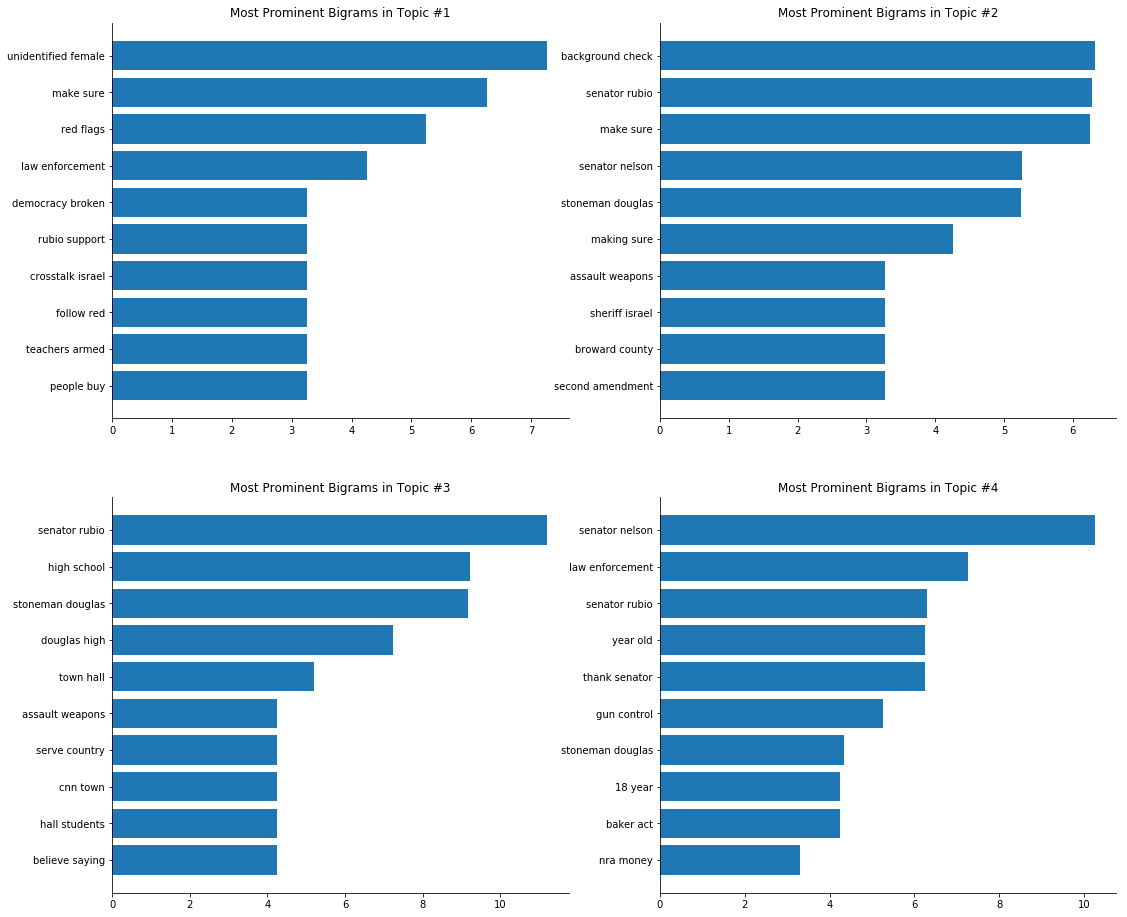

In [4]:
from sklearn.feature_extraction import stop_words

stop = list(stop_words.ENGLISH_STOP_WORDS)

banned = ["applause", "tapper", "tell", "let", "want", "know", 
 "let", "got", "don", "sir", "yes", "little", "question", "ask", "answer", "said", "goin", "don", "lapido", "ll", "want", "bring", "" "us", "go", "also", "lot", "'s", "'re", "n't", "'m", "going", "--_--", "—", "--", "'ve", "ve"]


banned_total = set(stop + banned)

vectorizer = CountVectorizer(stop_words=banned_total, ngram_range=(2,2))

vectorized = vectorizer.fit_transform(df)

topics_no = 4
range_t = topics_no + 1

lda = LatentDirichletAllocation(n_topics=topics_no, learning_method='batch')
lda.fit(vectorized)

components = lda.components_
feature_names = vectorizer.get_feature_names()




fig, axes = plt.subplots(2,2, figsize=(18, 16))
for component,ax,i in zip(components, axes.flatten(), range(1,range_t)):
    plot_lda(component, feature_names, ax=ax, title = 'Most Prominent Bigrams in Topic #%d' %i)

        

In [5]:
import PyPDF2
import csv

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from gensim import corpora
from gensim.models import LdaModel

import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation, PCA
from sklearn.cluster import KMeans

import pyLDAvis.gensim

def bigram_preprocess(tokens, deacc=True, lowercase=True, errors='ignore',
    stemmer=None, stopwords=None):
    """
    Convert a document into a list of tokens.
    Split text into sentences and sentences into bigrams.
    the bigrams returned are the tokens
    """
    bigrams = []

    if len(tokens) >1:
        for i in range(0,len(tokens)-1):
            yield tokens[i] + '_' + tokens[i+1]

#nltk.download()

/Users/gauravsingh/anaconda2/lib/python2.7/site-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.22) or chardet (2.3.0) doesn't match a supported version!
  RequestsDependencyWarning)


In [6]:
df 

documents = df

from sklearn.feature_extraction import stop_words

stop = list(stop_words.ENGLISH_STOP_WORDS)

banned = ["applause", "tapper", "tell", "let", "want", "know", 
 "let", "got", "don", "sir", "yes", "little", "question", "ask", "answer", "said", "goin", "don", "lapido", "ll", "want", "bring", "" "us", "go", "also", "lot", "'s", "'re", "n't", "'m", "going", "--_--", "—", "--", "'ve", "ve"]



banned_total = set(stop + banned)

texts = [word_tokenize(doc)  for doc in documents]
texts_lower = [[word.lower() for word in text] for text in texts]
unigrams = [[word for word in text if not word.isdigit() and word not in banned_total and len(word) > 1] for text in texts_lower]

bigrams = [[bigram for bigram in bigram_preprocess(text)] for text in unigrams]

dictionary_bigrams = corpora.Dictionary(bigrams, prune_at=20000000)
dictionary_bigrams.save_as_text('gensim_dict_bigrams.txt')



In [7]:
corpus = [dictionary_bigrams.doc2bow(text) for text in bigrams]
lda = LdaModel(corpus, num_topics=5, id2word=dictionary_bigrams)

pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, dictionary_bigrams)

/Users/gauravsingh/anaconda2/lib/python2.7/site-packages/gensim/matutils.py:995: RuntimeWarning: invalid value encountered in subtract
  result = psi(alpha) - psi(np.sum(alpha))
/Users/gauravsingh/anaconda2/lib/python2.7/site-packages/gensim/models/ldamodel.py:527: RuntimeWarning: invalid value encountered in absolute
  meanchange = np.mean(abs(gammad - lastgamma))
/Users/gauravsingh/anaconda2/lib/python2.7/site-packages/gensim/models/ldamodel.py:809: RuntimeWarning: invalid value encountered in absolute
  logger.info("topic diff=%f, rho=%f", np.mean(np.abs(diff)), rho)
/Users/gauravsingh/anaconda2/lib/python2.7/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


LinAlgError: Array must not contain infs or NaNs